## Double Pendulum Motion

For double pendulum, the Lagrangian equations with generalized coordinate $\theta$ is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_1} = \frac{\partial\mathcal L}{\partial\theta_1}
 \quad\Longrightarrow\quad
 (m_1+m_2) L_1^2 \ddot \theta_1 +m_2L_1L_2 \ddot \theta_2 = -(m_1+m_2)gL_1\theta_1
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_2} = \frac{\partial\mathcal L}{\partial\theta_2}
 \quad\Longrightarrow\quad
 m_2 L_2^2 \ddot \theta_2 +m_2L_1L_2 \ddot \theta_1 = -m_2gL_2\theta_2
\end{align}$

By solving the lagrange equation, the Double Pendulum Motion could be writen as

\begin{equation}
\begin{aligned}
\ddot\theta_1 &= \frac{1}{L_1\xi}\left[L_1m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_1^2 + L_2m_2\sin(\theta_1-\theta_2)\dot\theta_2^2 - m_2g\cos(\theta_1-\theta_2)\sin(\theta_2) + (m_1+m_2)g\sin(\theta_1) \right],\\
\ddot\theta_2 &= \frac{1}{L_2\xi}\left[L_2m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_2^2 + L_1(m_1+m_2)\sin(\theta_1-\theta_2)\dot\theta_1^2+(m_1+m_2)g\sin(\theta_1)\cos(\theta_1-\theta_2) - (m_1+m_2)g\sin(\theta_2) \right],\\
\end{aligned}
\label{eq:motion_1}
\end{equation}

with

\begin{equation}
\xi \equiv \cos^2(\theta_1-\theta_2)m_2-m_1-m_2.
\end{equation}

or,

\begin{align}
\ddot\theta_1 &= \frac{1}{L_1\xi}\left[L_1m_2c_{12}s_{12}\omega_1^2 + L_2m_2s_{12}\omega_2^2 - m_2gc_{12}s_2 + (m_1+m_2)gs_1 \right],\\
\ddot\theta_2 &= \frac{1}{L_2\xi}\left[L_2m_2c_{12}s_{12}\omega_2^2 + L_1(m_1+m_2)s_{12}\omega_1^2+(m_1+m_2)gs_1c_{12} - (m_1+m_2)gs_2 \right],\\
\end{align}

where we have defined $c_{12} \equiv \cos(\theta_1-\theta_2)$, $s_{12} \equiv \sin(\theta_1-\theta_2)$, $s_i \equiv \sin(\theta_i)$ and $\xi \equiv c_{12}^2m_2-m_1-m_2$ to simplify the equation.



In [8]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import cos, sin, arange, pi
import matplotlib.cm as cm
import numpy as np
from IPython.display import display, Image
import matplotlib.animation as animation


%matplotlib inline

figsize = 5
dpi = 600
g = 9.81

In [9]:
class LagrangianDoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a double pendulum.
     
    """
    def __init__(self, L1=1., m1=1., g=1.,L2=1.,m2=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dw1_dt(L1,L2,m1,m2,w1,w2,cos12,sin12,sin1,sin2,xi):
        """
        This function returns the first right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        """
        w1dot = ( L1*m2*cos12*sin12*w1**2 + L2*m2*sin12*w2**2
            - m2*g*cos12*sin2      + (m1 + m2)*g*sin1)/(L1*xi);
        
        return w1dot;
    
    def dw2_dt(L1,L2,m1,m2,w1,w2,cos12,sin12,sin1,sin2,xi):
        """
        This function returns the second right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        """
        w2dot = -( L2*m2*cos12*sin12*w2**2 + L1*(m1 + m2)*sin12*w1**2
            + (m1 + m2)*g*sin1*cos12  - (m1 + m2)*g*sin2 )/(L2*xi)
        
        return w2dot;
    
    def solve_ode(self, rhs, z0):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = odeint(rhs, z0, t, args=(self.L1, self.L2, self.m1, self.m2, self.g))

        return solution;

In [10]:
def rhs(z, t, L1, L2, m1, m2, g):
    """ Return the right hand side of the 
    ordinary differential equation
    """
    theta1, w1, theta2, w2 = z
    cos12 = cos(theta1 - theta2)
    sin12 = sin(theta1 - theta2)
    sin1 = sin(theta1)
    sin2 = sin(theta2)
    xi = cos12**2*m2 - m1 - m2
    w1dot = LagrangianDoublePendulum.dw1_dt(L1,L2,m1,m2,w1,w2,cos12,sin12,sin1,sin2,xi)
    w2dot = LagrangianDoublePendulum.dw2_dt(L1,L2,m1,m2,w1,w2,cos12,sin12,sin1,sin2,xi)
    return w1, w1dot, w2, w2dot


def cartesian(theta1, w1, theta2, w2, L1, L2):
    """ Transforms theta and omega to cartesian coordinates
    and velocities x1, y1, x2, y2, vx1, vy1, vx2, vy2
    """
    x1 = L1 * sin(theta1)
    y1 = -L1 * cos(theta1)
    x2 = x1 + L2 * sin(theta2)
    y2 = y1 - L2 * cos(theta2)
    vx1 = L1*cos(theta1)*w1
    vy1 = L1*sin(theta1)*w1
    vx2 = vx1 + L2*cos(theta2)*w2
    vy2 = vy1 + L2*sin(theta2)*w2
    return x1, y1, x2, y2, vx1, vy1, vx2, vy2

def plot_angle(theta1, theta2, t):
    """ Plots the motion of the angles and the angular
    velocities as a function of time.
    """
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)

    # theta-t plot
    ax = plt.subplot(2, 2, 2)
    ax.plot(t, theta1, label=r"$\theta_1(t)$")
    ax.plot(t, theta2, label=r"$\theta_2(t)$")
    plt.ylabel(r"$\theta$, [rad]")
    plt.xlabel(r"$t$, [s]")
    ax.legend()
    plt.xlim([0, np.max(t)])

    plt.show()

def create_animation(filename, x1, y1, x2, y2, tmax, L1, L2):
    """ Creates an animation of the double pendulum, which stored as .gif.
    """
    
    fig = plt.figure(figsize=(4, 4), dpi=60)
    L = 1.1*(L1 + L2)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-L, L), ylim=(-L, L))

    tail1, = ax.plot([],[],'r')
    line, = ax.plot([], [], '-o', lw=2, c="k")
    time_template = r'$t = %.1fs$'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    ax.set_aspect('equal')
    ax.axis('off')

    # number of frames
    FPS = 15
    framesNum = int(FPS*tmax)
    frames = np.floor(np.linspace(0, len(x1) - 1, framesNum)).astype(np.int)

    def init():
        line.set_data([], [])
        tail1.set_data([], [])
        time_text.set_text('')
        return line, time_text

    def animate(i):
        line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
        tail1.set_data(x2[:i], y2[:i])
        time_text.set_text(time_template % (i*dt))
        return line, time_text, tail1

    anim = animation.FuncAnimation(fig, animate, frames=frames)

    # Save animation
    anim.save(filename + '.gif', writer='imagemagick', fps=FPS)

    plt.close(anim._fig)

    # Display the animation
    with open(filename + '.gif','rb') as file:
        display(Image(file.read()))

Now, we need to define the parameters.

In [11]:
L1, L2 = 1., 2.
m1, m2 = 3., 1.


z0 = [pi/2, 0, pi/2, 0]
tmax, dt = 50, 0.01
t = arange(0, tmax+dt, dt)

Transform the results to cartesian coordinates,

In [12]:
# Perform simulation
p1 = LagrangianDoublePendulum(L1=L1, m1=m1,g=g,L2=L2,m2=m2)
z = p1.solve_ode(rhs, z0)

# Extract result
theta1, w1, theta2, w2 = z[:,0], z[:,1], z[:,2], z[:,3]
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = cartesian(theta1, w1, theta2, w2, L1, L2)

We can now plot the results and create an animation.

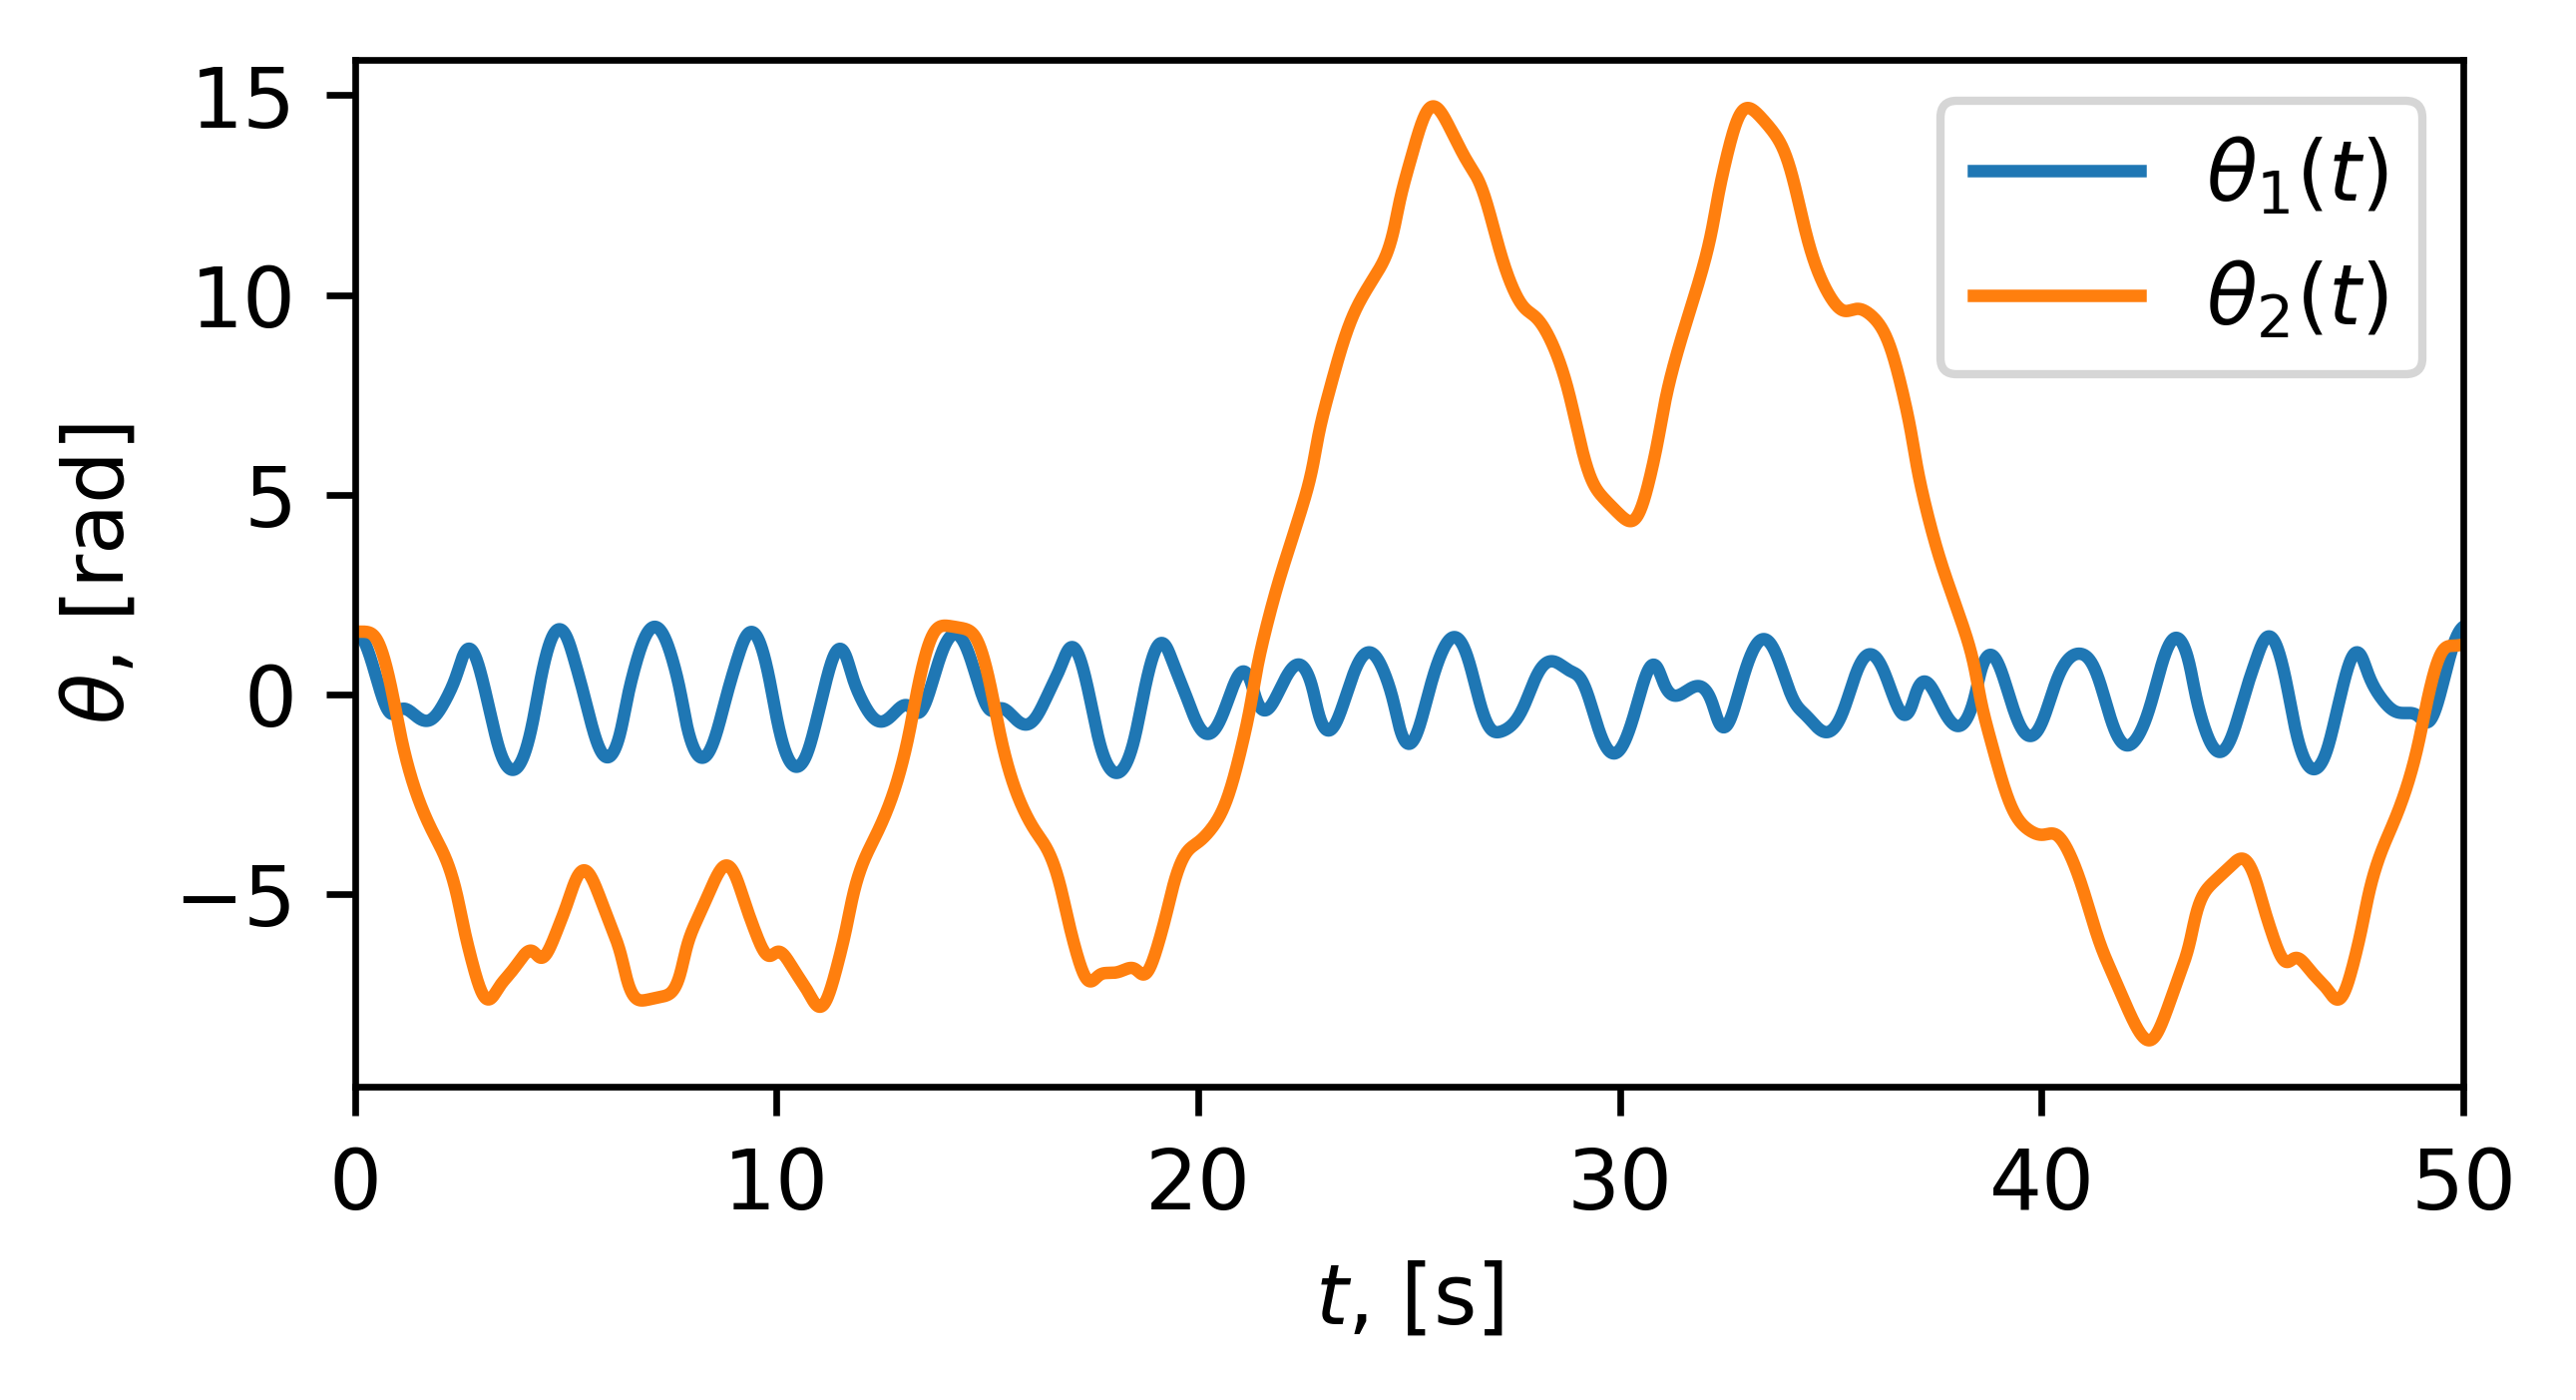

In [13]:
plot_angle(theta1, theta2, t)

C:\Users\XIUHAN~1\AppData\Local\Temp/ipykernel_17304/2707514958.py:65: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames = np.floor(np.linspace(0, len(x1) - 1, framesNum)).astype(np.int)
MovieWriter imagemagick unavailable; using Pillow instead.


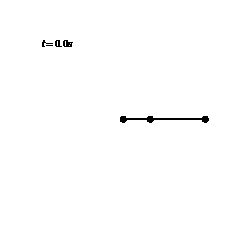

In [14]:
create_animation("double_pendulum", x1, y1, x2, y2, tmax, L1, L2)

As we can see, the result is chaotic and difficult to interpret.